In [2]:
%matplotlib inline
import d2l
from mxnet import autograd, nd 
import random

In [6]:
def synthetic_data(w,b,num_examples):
    X = nd.random.normal(0,1,shape=(num_examples,len(w)))
    y = nd.dot(X,w)+b
    y+=nd.random.normal(scale=0.01,shape=y.shape)
    return X,y

In [20]:
true_w = nd.array([1,2])
true_b = 3
features,labels = synthetic_data(true_w,true_b,1000)


(2,)

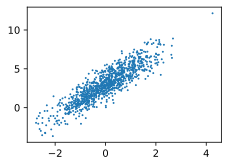

In [14]:
d2l.set_figsize((3.5,2.5))
d2l.plt.scatter(features[:,1].asnumpy(),labels.asnumpy(),1)

In [17]:
def data_iter(features,labels, batch_size):
    num_examples=len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        j = nd.array(indices[i:min(i+batch_size,num_examples)])
        yield features.take(j),labels.take(j)
    

In [18]:
batch_size = 10
for X,y in data_iter(features,labels,batch_size):
    print(X,y)
    break


[[ 0.6615119  -1.0803293 ]
 [ 0.14248882  0.25091952]
 [ 0.7159771  -1.3289964 ]
 [ 0.10010736  0.9994461 ]
 [-1.61783    -0.51648057]
 [-0.70237154 -1.3256987 ]
 [-0.9016167  -0.2679676 ]
 [ 0.00391134 -1.2977078 ]
 [-0.48757744 -0.9287864 ]
 [-0.64276254 -1.6069344 ]]
<NDArray 10x2 @cpu(0)> 
[ 1.5016057   3.6350846   1.0708877   5.0914307   0.3305453  -0.3603882
  1.5696665   0.39523354  0.6656586  -0.87291324]
<NDArray 10 @cpu(0)>


In [32]:
w = nd.random.normal(scale=0.01,shape=(2,1))
b = nd.zeros(shape=(1,))

In [33]:
w.attach_grad()
b.attach_grad()

In [34]:
def linreg(X,w,b):
    return nd.dot(X,w)+b
def squared_loss(y_hat,y):
    return (y_hat-y.reshape(y_hat.shape))**2/2

In [35]:
def sgd(params,lr,batch_size):
    for param in params:
        param[:] -= lr*param.grad/batch_size

In [36]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss
for epoch in range(num_epochs):
    for X,y in data_iter(features,labels,batch_size):
        with autograd.record():
            l = loss(net(X,w,b),y)
        l.backward()
        sgd([w,b],lr,batch_size)
    train_l = loss(net(features,w,b),labels)
    print('epoch %d loss %f'%(epoch+1,train_l.mean().asnumpy()))

epoch 1 loss 0.014418
epoch 2 loss 0.000079
epoch 3 loss 0.000052


In [38]:
print(true_w - w.reshape(true_w.shape))
print(true_b - b)


[5.2392483e-05 2.4604797e-04]
<NDArray 2 @cpu(0)>

[0.0001111]
<NDArray 1 @cpu(0)>
